# Demonstrate the Ability to Pass Mulitple Weather Years Through the WECC 2032 ADS


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta


## Set the Directory Structure

In [52]:
# Identify the top-level directory and the subdirectory where the data will be stored:
ads_load_data_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_ads2032_loads/data/'
tell_load_data_dir = '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_ads2032_loads/data/TELL_Loads/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_ads2032_loads/plots/'


## Process the Peak Load Magnitude and Date for Each Weather Year


In [61]:
# Define a function to process the extract the peak demand value and time for each year:
def process_peak_load_magnitude_and_date(ads_load_data_dir: str, tell_load_data_dir: str):
    
    #Initiate a counter and empty dataframe to store the results:
    counter = 1;
    output_df = pd.DataFrame()

    # Read in the raw data .csv file for the 2032 ADS data:
    gv_df = pd.read_csv((ads_load_data_dir + '2032ADS_EEI_Format_Data.csv'))

    # Subset to just hourly demand by BA, drop the index column, and convert the values to floats:
    gv_df = gv_df[1:8761]
    del gv_df["Index"]
    gv_df = gv_df.astype(np.float64)
    
    # Sum the loads across BAs by hour and convert the value from MW to GW:
    gv_df['Total_Load_GW'] = ((gv_df.sum(axis=1)) / 1000).round(2)

    # Reset the index column:
    gv_df = gv_df.reset_index()

    # Put the output in a new dataframe:
    output_df.loc[counter, 'Source'] = 'ADS'
    output_df.loc[counter, 'Weather_Year'] = 2018
    output_df.loc[counter, 'Total_Load_TWh'] = ((gv_df['Total_Load_GW'].sum()) / 1000).round(2)
    output_df.loc[counter, 'Peak_Load_GW'] = gv_df['Total_Load_GW'].max()
    output_df.loc[counter, 'Peak_Day'] = ((gv_df['index'].loc[gv_df['Total_Load_GW'].idxmax()])/24).round(2)

    # Clean up and move to the TELL loads:
    del gv_df
    
    # Loop over the years of TELL load data:
    for year in range(1980,2025,1):
        # Iterate the counter by one:
        counter = counter + 1
        
        # Read in the raw data .csv file for the TELL weather year:
        gv_df = pd.read_csv((tell_load_data_dir + 'TELL_Loads_2032_Based_on_' + str(year) + '_Weather.csv'))

        # Subset to just hourly demand by BA, drop the index column, and convert the values to floats:
        gv_df = gv_df[1:8761]
        del gv_df["Index"]
        gv_df = gv_df.astype(np.float64)
    
        # Sum the loads across BAs by hour and convert the value from MW to GW:
        gv_df['Total_Load_GW'] = ((gv_df.sum(axis=1)) / 1000).round(2)

        # Reset the index column:
        gv_df = gv_df.reset_index()

        # Put the output in a new dataframe:
        output_df.loc[counter, 'Source'] = 'TELL'
        output_df.loc[counter, 'Weather_Year'] = year
        output_df.loc[counter, 'Total_Load_TWh'] = ((gv_df['Total_Load_GW'].sum()) / 1000).round(2)
        output_df.loc[counter, 'Peak_Load_GW'] = gv_df['Total_Load_GW'].max()
        output_df.loc[counter, 'Peak_Day'] = ((gv_df['index'].loc[gv_df['Total_Load_GW'].idxmax()])/24).round(2)
    
        # Clean up and move to the next year:
        del gv_df
        
    return output_df


In [62]:
# Process the peak demand value and time for each year:
output_df = process_peak_load_magnitude_and_date(ads_load_data_dir = ads_load_data_dir, 
                                                 tell_load_data_dir = tell_load_data_dir)

output_df


,Source,Weather_Year,Total_Load_TWh,Peak_Load_GW,Peak_Day
1,ADS,2018.0,1049.75,182.19,201.71
2,TELL,1980.0,1049.82,182.95,209.08
3,TELL,1981.0,1052.06,175.40,218.04
4,TELL,1982.0,1052.06,170.65,245.04
5,TELL,1983.0,1052.06,178.84,218.04
6,TELL,1984.0,1049.65,172.29,187.08
7,TELL,1985.0,1052.06,184.04,189.08
8,TELL,1986.0,1052.06,174.27,231.04
9,TELL,1987.0,1052.06,172.39,216.04
10,TELL,1988.0,1049.73,175.66,207.04


## Make the Double Distribution Plot


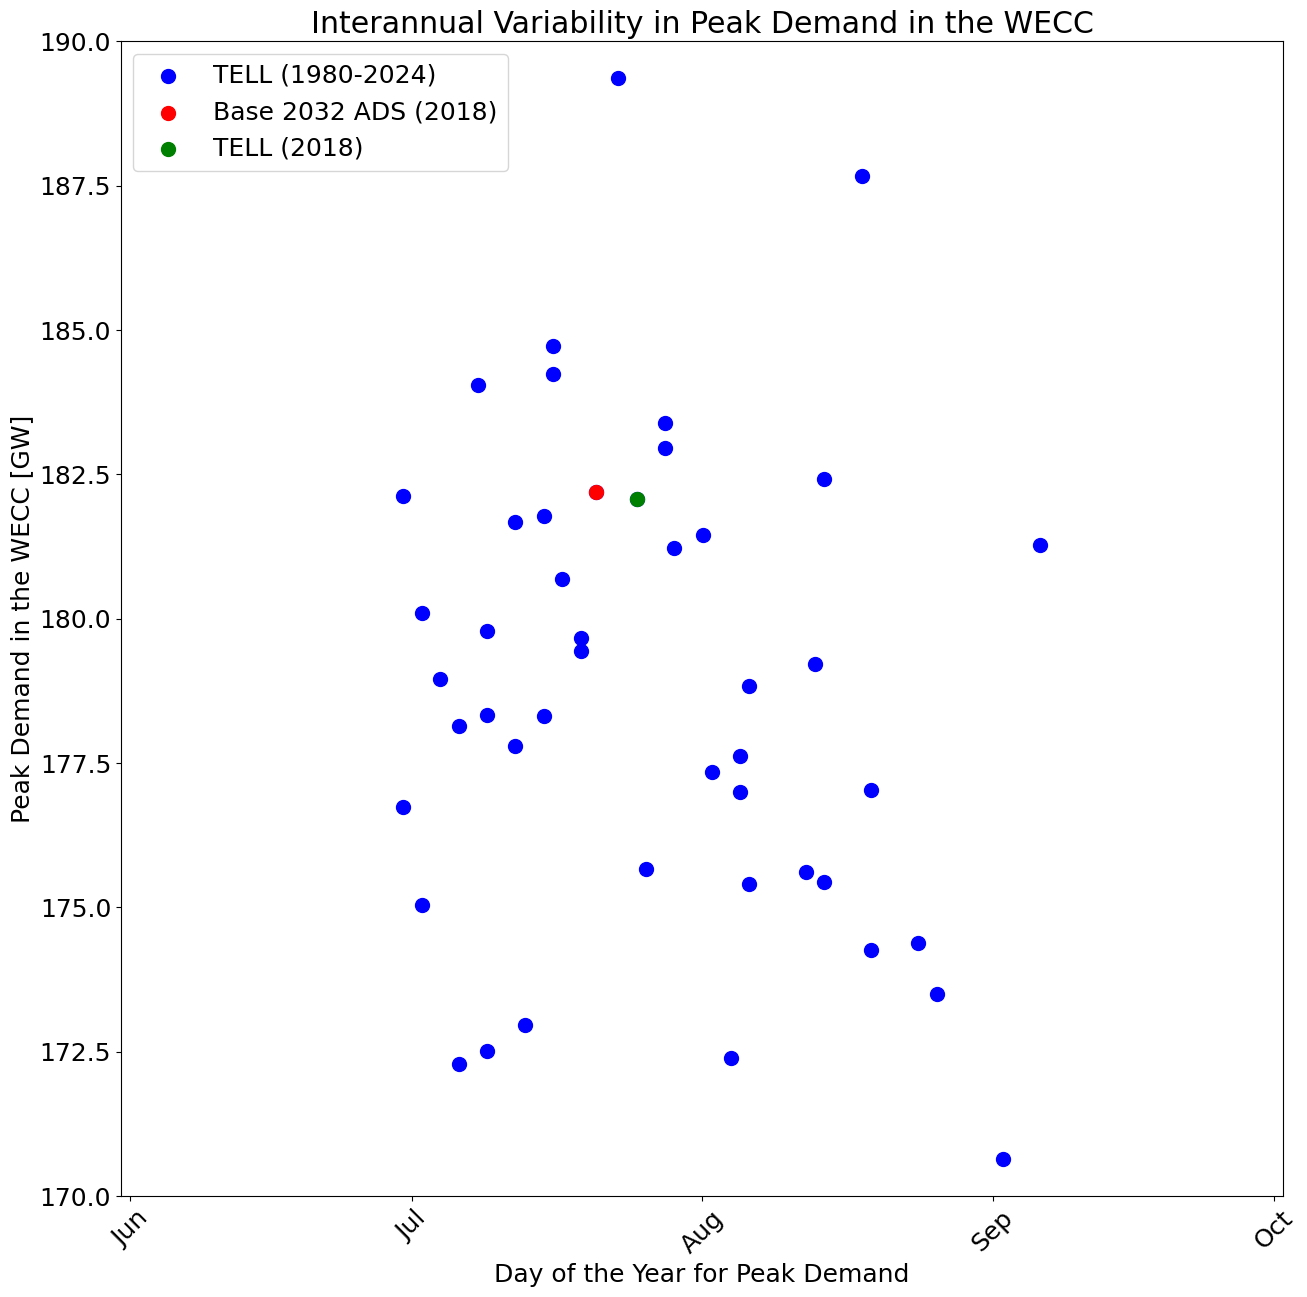

In [83]:
# Subset to just the year 2019:
ads_df = output_df.loc[output_df['Source'] == 'ADS'].copy()
tell_2018_df = output_df.loc[(output_df['Source'] == 'TELL') & (output_df['Weather_Year'] == 2018)].copy()

# Make the plot:
plt.figure(figsize=(15, 15))
plt.rcParams['font.size'] = 18
plt.scatter(output_df['Peak_Day'], output_df['Peak_Load_GW'], s=100, c='blue', label = 'TELL (1980-2024)')
plt.scatter(ads_df['Peak_Day'], ads_df['Peak_Load_GW'], s=100, c='red', label = 'Base 2032 ADS (2018)')
plt.scatter(tell_2018_df['Peak_Day'], tell_2018_df['Peak_Load_GW'], s=100, c='green', label = 'TELL (2018)')
plt.legend(loc='upper left')
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation = 45)
plt.xlim([151, 275])
plt.ylim([170, 190])
plt.xlabel('Day of the Year for Peak Demand')
plt.ylabel('Peak Demand in the WECC [GW]')
plt.title('Interannual Variability in Peak Demand in the WECC')

plt.savefig(os.path.join(image_output_dir, ('WECC_Peak_Demand_Distribution.png')), dpi=300, bbox_inches='tight', facecolor='white')
